# import dataset and libraries

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import warnings 
warnings.filterwarnings('ignore')

In [22]:
df = sns.load_dataset('iris')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Label Encoding 

In [24]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df = df[['sepal_length','petal_length','species']]

In [27]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


# train test split

In [28]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# apply soft max with the parameters 'multinomial'

In [30]:
clf = LogisticRegression(multi_class='multinomial')

In [31]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [34]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [35]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [36]:
clf.predict(query)

array([0])

# plot the graph what decision boundaries it created

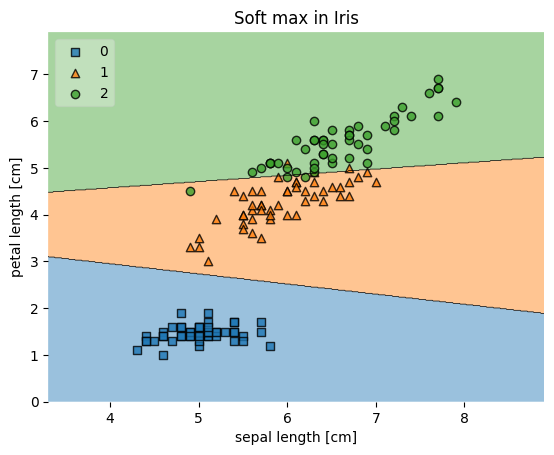

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

plt.title("Soft max in Iris")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()